# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import math
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots



# 1. EDA

cargamos el dataset

In [2]:
df = pd.read_csv('../data/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


estudio inicial de los datos

In [3]:
df.shape

(101766, 50)

In [4]:
# los tipos de dato de cada columna
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

analisis columna weight

In [ ]:
import pandas as pd

def analisis_valores(columna):

    # Ignorar valores faltantes de la columna original para el conteo
    mask_no_na = ~columna.isna()
    
    # Convertir a numérico, forzando errores a NaN
    numeros = pd.to_numeric(columna, errors='coerce')
    
    # Conteo de valores numéricos y no numéricos (excluyendo nulos originales)
    count_numericos = numeros[mask_no_na].notna().sum()
    count_no_numericos = mask_no_na.sum() - count_numericos
    
    # Obtener los valores no numéricos:
    no_numericos_series = columna[mask_no_na][numeros[mask_no_na].isna()]
    valores_no_numericos = no_numericos_series.unique().tolist()
    
    # Calcular porcentaje de cada valor único no numérico
    conteo_unicos = no_numericos_series.value_counts()
    porcentaje_no_numericos = (conteo_unicos / conteo_unicos.sum() * 100).to_dict()
    
    # Calcular media y desviación estándar para los valores numéricos
    media_numericos = numeros[mask_no_na].dropna().mean()
    std_numericos = numeros[mask_no_na].dropna().std()
    
    return {
        "numericos": count_numericos,
        "no_numericos": count_no_numericos,
        "porcentaje_no_numericos": porcentaje_no_numericos,
        "media_numericos": media_numericos,
        "std_numericos": std_numericos
    }



In [ ]:
analisis_valores(df['weight'])

cambiar ID a objetos y no numeros

In [5]:
# change wrong data types
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df['encounter_id'] = df['encounter_id'].astype(str)
df['patient_nbr'] = df['patient_nbr'].astype(str)


In [ ]:
df.describe()

In [ ]:
def estudio_dataset(df, exclude_columns=None):
    """
    Realiza un estudio de las columnas de un dataset.

    Para columnas numéricas, genera un resumen descriptivo (con información adicional sobre valores faltantes).
    Para columnas categóricas, muestra los valores únicos, el porcentaje de cada valor y la cantidad de faltantes.

    Parámetros:
        df (pd.DataFrame): Dataset a analizar.
        exclude_columns (list, opcional): Lista de nombres de columnas a excluir del análisis.

    Retorna:
        dict: Diccionario donde cada clave es el nombre de la columna (no excluida) y el valor es un diccionario
              con el estudio realizado para esa columna.
    """
    resultados = {}
    exclude_columns = exclude_columns or []

    for col in df.columns:
        if col in exclude_columns:
            continue

        if pd.api.types.is_numeric_dtype(df[col]):
            # Estudio para columnas numéricas
            resumen = df[col].describe()
            missing = df[col].isnull().sum()
            resumen_dict = resumen.to_dict()
            resumen_dict['missing'] = missing
            resultados[col] = {
                'tipo': 'numérica',
                'estudio': resumen_dict
            }
        else:
            # Estudio para columnas categóricas
            missing = df[col].isnull().sum()
            unique_values = df[col].dropna().unique().tolist()
            porcentajes = df[col].value_counts(normalize=True, dropna=True) * 100
            resultados[col] = {
                'tipo': 'categórica',
                'unique_values': unique_values,
                'porcentajes': porcentajes.to_dict(),
                'missing': missing
            }
    return resultados



In [ ]:
estudio_dataset(df, exclude_columns=['encounter_id', 'patient_nbr'])

## UNIVARIATE ANALYSIS

In [ ]:
def univariate_analysis_grid(df):
    """
    Genera un grid de plots univariados para todas las columnas del DataFrame.
    
    Para cada columna:
      - Si es numérica: genera un histograma.
      - Si es categórica: genera un gráfico de barras con el conteo de cada categoría.
    
    Los plots se organizan en un grid de 3 columnas por fila.
    
    Parámetros:
        df (pd.DataFrame): Dataset a analizar.
    """
    num_cols = len(df.columns)
    cols_per_row = 3
    rows = math.ceil(num_cols / cols_per_row)
    
    # Crear el grid de subplots
    fig = make_subplots(rows=rows, cols=cols_per_row, subplot_titles=df.columns)
    
    # Iterar por cada columna del DataFrame
    for i, col in enumerate(df.columns):
        row = i // cols_per_row + 1
        col_idx = i % cols_per_row + 1
        
        # Si la columna es numérica, usamos histograma
        if pd.api.types.is_numeric_dtype(df[col]):
            fig_tmp = px.histogram(df, x=col, title=f'Histograma de {col}')
        else:
            # Para columnas categóricas: contar valores
            count_df = df[col].value_counts().reset_index()
            count_df.columns = [col, 'Frecuencia']
            fig_tmp = px.bar(count_df, x=col, y='Frecuencia', title=f'Conteo de {col}')
        
        # Agregar las trazas del plot temporal al subplot correspondiente
        for trace in fig_tmp.data:
            fig.add_trace(trace, row=row, col=col_idx)
    
    # Ajustar layout del grid
    fig.update_layout(height=rows * 400, width=1200, title_text="Análisis Univariado - Grid de Plots")
    fig.show()


In [ ]:
univariate_analysis_grid(df)

# Bivariate analysis


In [10]:
def analisis_numerico(df):
    """
    Función que recibe un DataFrame de pandas y genera un análisis bivariante
    utilizando un pairplot para las columnas numéricas con paleta pastel.
    Se ajustan los ángulos de las etiquetas para que no se solapen.
    """
    # Seleccionar únicamente las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    if len(columnas_numericas) < 2:
        print("El DataFrame debe tener al menos dos columnas numéricas para realizar un análisis bivariante.")
        return

    sns.set_palette("pastel")
    # Crear el pairplot (se puede ajustar el tamaño de cada subgráfico con 'height')
    pair_plot = sns.pairplot(df[columnas_numericas], height=3)
    # Ajustar los ángulos de las etiquetas de cada eje
    for ax in pair_plot.axes.flatten():
        ax.tick_params(axis='x', rotation=0)
        ax.tick_params(axis='y', rotation=90)
    plt.suptitle("Análisis Bivariante", y=1.02)
    plt.tight_layout()
    plt.show()


def matriz_correlacion(df):
    """
    Función que recibe un DataFrame de pandas y genera una matriz de correlación
    visualizada con un heatmap de seaborn con paleta pastel.
    """
    # Seleccionar solo columnas numéricas
    df_numerico = df.select_dtypes(include=['number'])
    if df_numerico.shape[1] < 2:
        print("El DataFrame debe tener al menos dos columnas numéricas para calcular la correlación.")
        return

    # Calcular la matriz de correlación
    corr_matrix = df_numerico.corr()

    sns.set_palette("pastel")
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Pastel1")
    plt.title("Matriz de Correlación")
    plt.tight_layout()
    plt.show()


def analisis_categorico(df, excluir=None):
    """
    Función que recibe un DataFrame de pandas y genera un análisis bivariante para
    las columnas categóricas, mostrando para cada par una tabla de contingencia
    en forma de heatmap utilizando seaborn con paleta pastel.
    
    Parámetros:
      - df: DataFrame de pandas.
      - excluir: lista de columnas a excluir del análisis (opcional).
    """
    # Seleccionar columnas categóricas
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Excluir las columnas indicadas (si las hay)
    if excluir is not None:
        columnas_categoricas = [col for col in columnas_categoricas if col not in excluir]
    
    if len(columnas_categoricas) < 2:
        print("El DataFrame debe tener al menos dos columnas categóricas (después de excluir) para realizar un análisis bivariante.")
        return
    
    # Generar los pares de columnas y sus respectivas tablas de contingencia
    pares = []
    for i in range(len(columnas_categoricas)):
        for j in range(i+1, len(columnas_categoricas)):
            col1 = columnas_categoricas[i]
            col2 = columnas_categoricas[j]
            print(f"Analizando relación entre '{col1}' y '{col2}'")
            
            # Copiar y reemplazar los valores nulos por '?'
            df_temp = df[[col1, col2]].copy()
            df_temp[col1] = df_temp[col1].fillna("?")
            df_temp[col2] = df_temp[col2].fillna("?")
            
            # Generar la tabla de contingencia
            tabla_contingencia = pd.crosstab(df_temp[col1], df_temp[col2], dropna=False)
            if tabla_contingencia.empty:
                print(f"La tabla de contingencia para {col1} y {col2} está vacía.")
                continue
            
            pares.append((col1, col2, tabla_contingencia))
    
    # Agrupar y mostrar los heatmaps de 2 en 2
    por_figura = 2
    for idx in range(0, len(pares), por_figura):
        grupo = pares[idx:idx+por_figura]
        ncols = len(grupo)
        fig, axes = plt.subplots(1, ncols, figsize=(6 * ncols, 5))
        if ncols == 1:
            axes = [axes]
        for ax, (col1, col2, tabla_contingencia) in zip(axes, grupo):
            sns.set_palette("pastel")
            sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap="Pastel1", ax=ax)
            ax.set_title(f"Tabla de contingencia: {col1} vs {col2}")
            ax.set_xlabel(col2)
            ax.set_ylabel(col1)
        plt.tight_layout()
        plt.show()

def analisis_target(df, target,excluir=None):
    """
    Función que recibe un DataFrame de pandas y genera un análisis bivariante para
    las columnas categóricas, mostrando para cada par una tabla de contingencia
    en forma de heatmap utilizando seaborn con paleta pastel.
    
    Parámetros:
      - df: DataFrame de pandas.
      - excluir: lista de columnas a excluir del análisis (opcional).
    """
    # Seleccionar columnas categóricas
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Excluir las columnas indicadas (si las hay)
    if excluir is not None:
        columnas_categoricas = [col for col in columnas_categoricas if col not in excluir]
    
    
    # Generar los pares de columnas y sus respectivas tablas de contingencia
    pares = []
    for i in range(len(columnas_categoricas)):
        col1 = columnas_categoricas[i]
        col2 = target
        print(f"Analizando relación entre '{col1}' y '{col2}'")
        
        # Copiar y reemplazar los valores nulos por '?'
        df_temp = df[[col1, col2]].copy()
        df_temp[col1] = df_temp[col1].fillna("?")
        df_temp[col2] = df_temp[col2].fillna("?")
        
        # Generar la tabla de contingencia
        tabla_contingencia = pd.crosstab(df_temp[col1], df_temp[col2], dropna=False)
        if tabla_contingencia.empty:
            print(f"La tabla de contingencia para {col1} y {col2} está vacía.")
            continue
        
        pares.append((col1, col2, tabla_contingencia))
    
    # Agrupar y mostrar los heatmaps de 2 en 2
    por_figura = 2
    for idx in range(0, len(pares), por_figura):
        grupo = pares[idx:idx+por_figura]
        ncols = len(grupo)
        fig, axes = plt.subplots(1, ncols, figsize=(6 * ncols, 5))
        if ncols == 1:
            axes = [axes]
        for ax, (col1, col2, tabla_contingencia) in zip(axes, grupo):
            sns.set_palette("pastel")
            sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap="Pastel1", ax=ax)
            ax.set_title(f"Tabla de contingencia: {col1} vs {col2}")
            ax.set_xlabel(col2)
            ax.set_ylabel(col1)
        plt.tight_layout()
        plt.show()

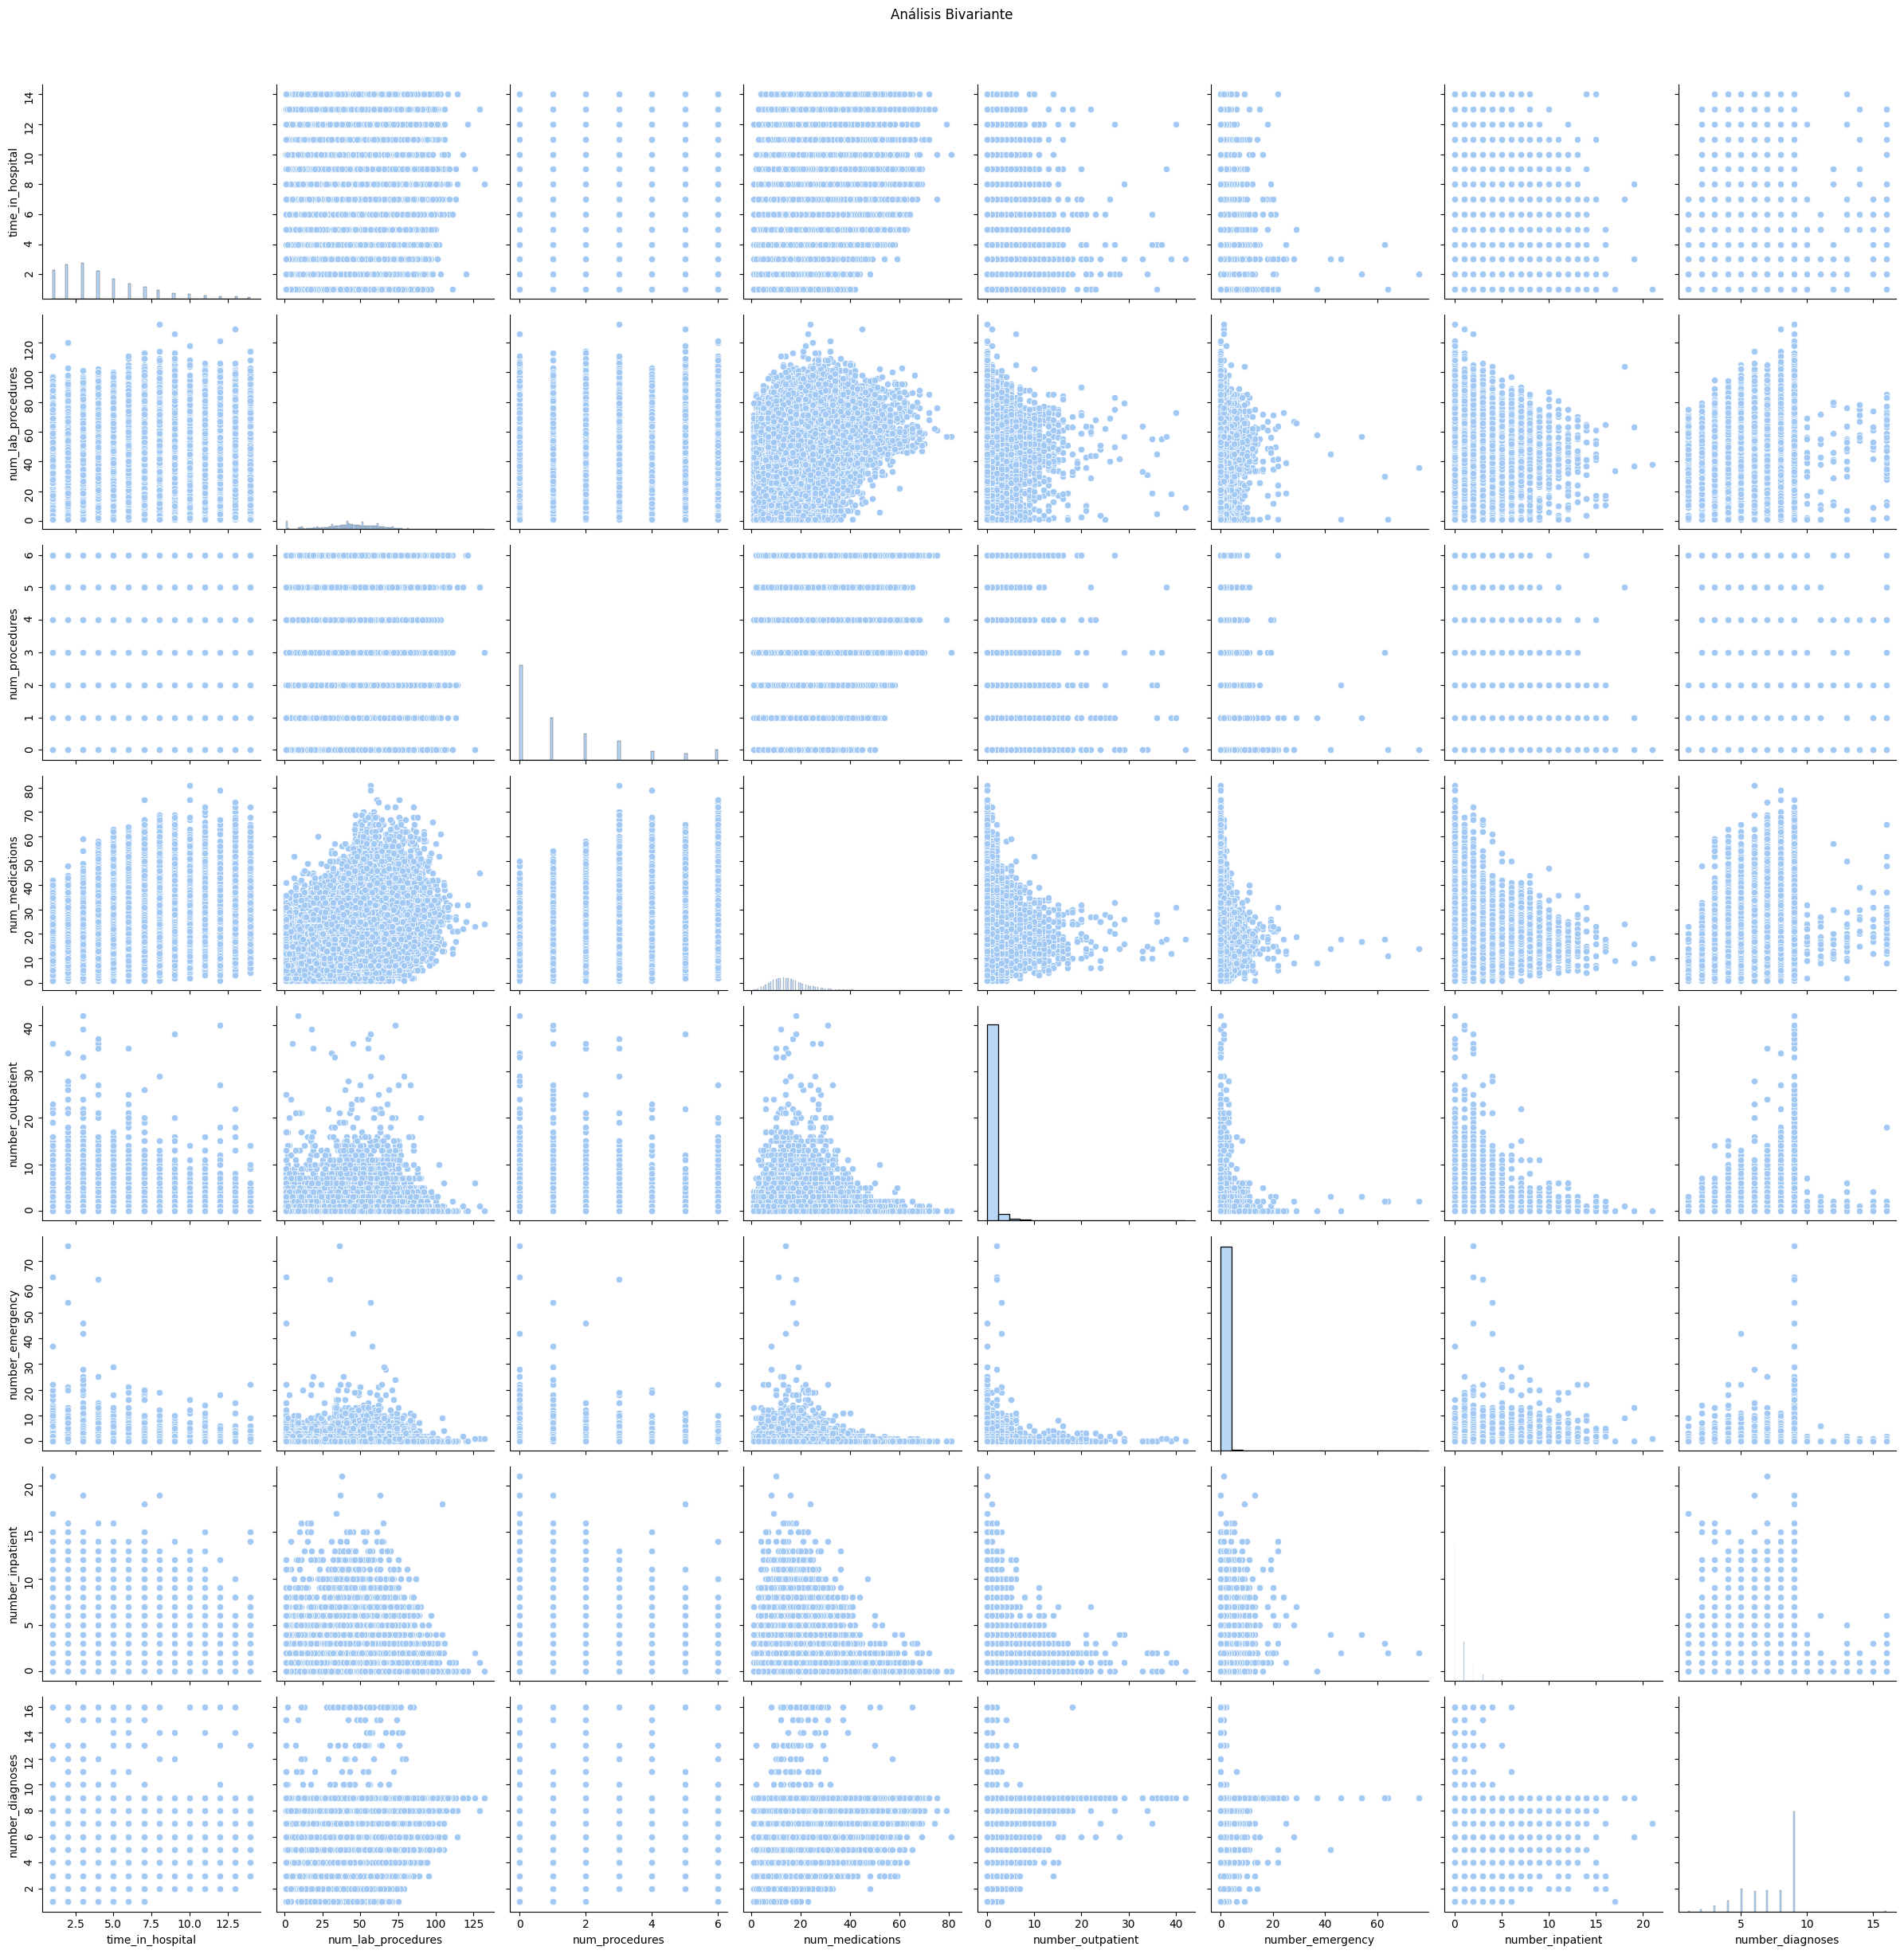

In [7]:
analisis_numerico(df)

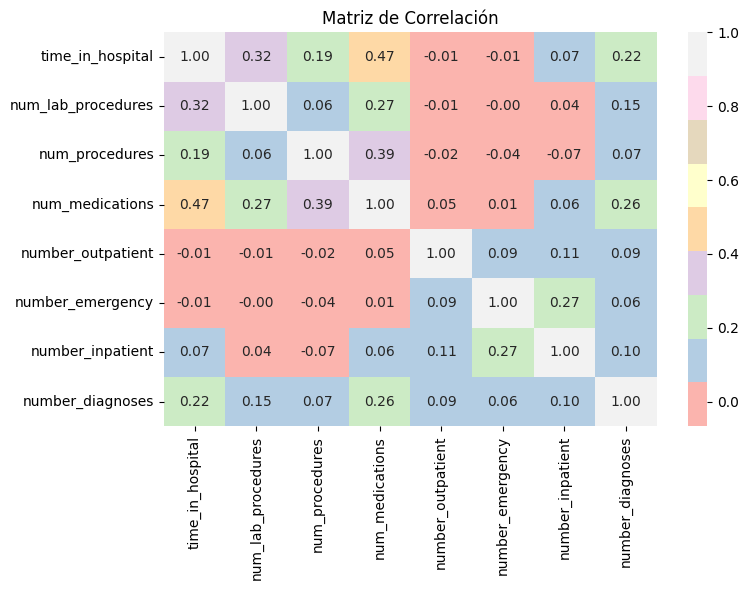

In [8]:
matriz_correlacion(df)

In [11]:
# analisis_categorico(df, excluir=['encounter_id', 'patient_nbr'])

Analizando relación entre 'race' y 'readmitted'
Analizando relación entre 'gender' y 'readmitted'
Analizando relación entre 'age' y 'readmitted'
Analizando relación entre 'weight' y 'readmitted'
Analizando relación entre 'admission_type_id' y 'readmitted'
Analizando relación entre 'discharge_disposition_id' y 'readmitted'
Analizando relación entre 'admission_source_id' y 'readmitted'
Analizando relación entre 'payer_code' y 'readmitted'
Analizando relación entre 'medical_specialty' y 'readmitted'
Analizando relación entre 'diag_1' y 'readmitted'
Analizando relación entre 'diag_2' y 'readmitted'
Analizando relación entre 'diag_3' y 'readmitted'
Analizando relación entre 'max_glu_serum' y 'readmitted'
Analizando relación entre 'A1Cresult' y 'readmitted'
Analizando relación entre 'metformin' y 'readmitted'
Analizando relación entre 'repaglinide' y 'readmitted'
Analizando relación entre 'nateglinide' y 'readmitted'
Analizando relación entre 'chlorpropamide' y 'readmitted'
Analizando relaci

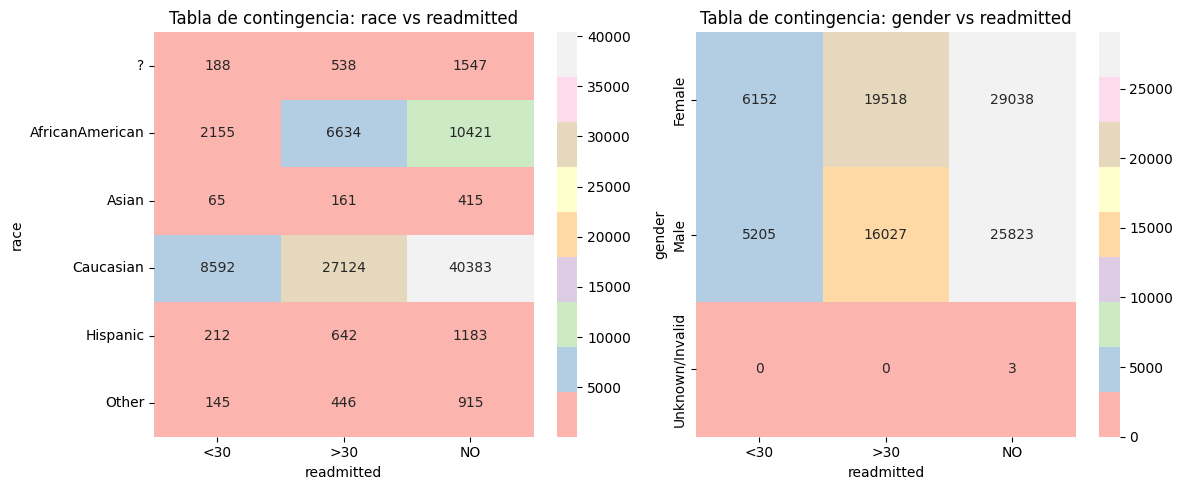

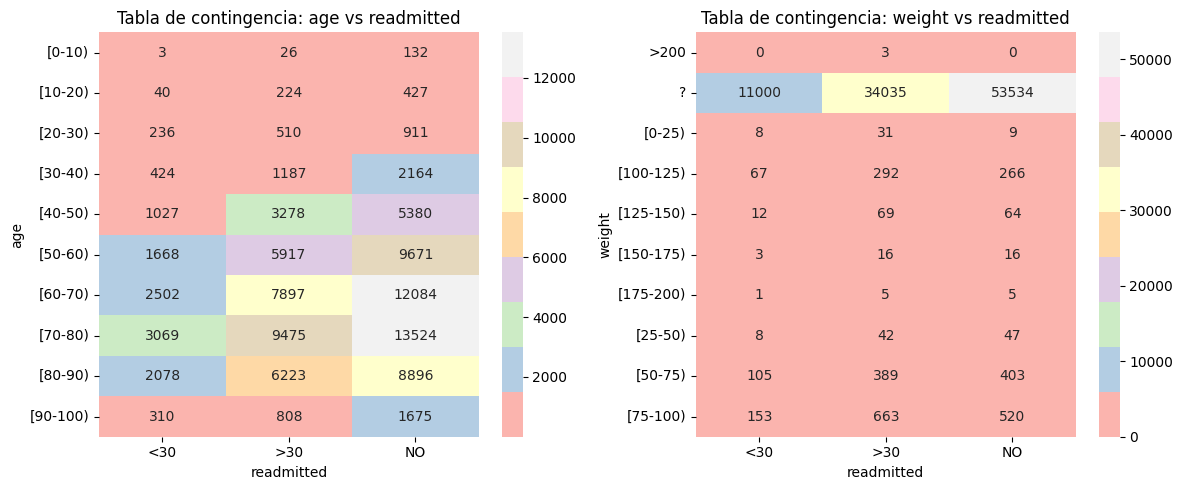

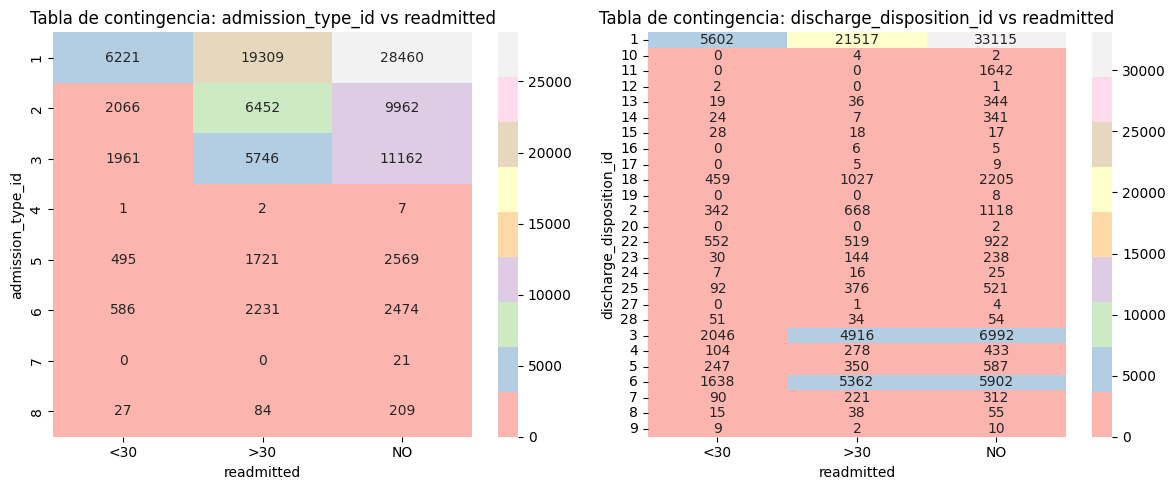

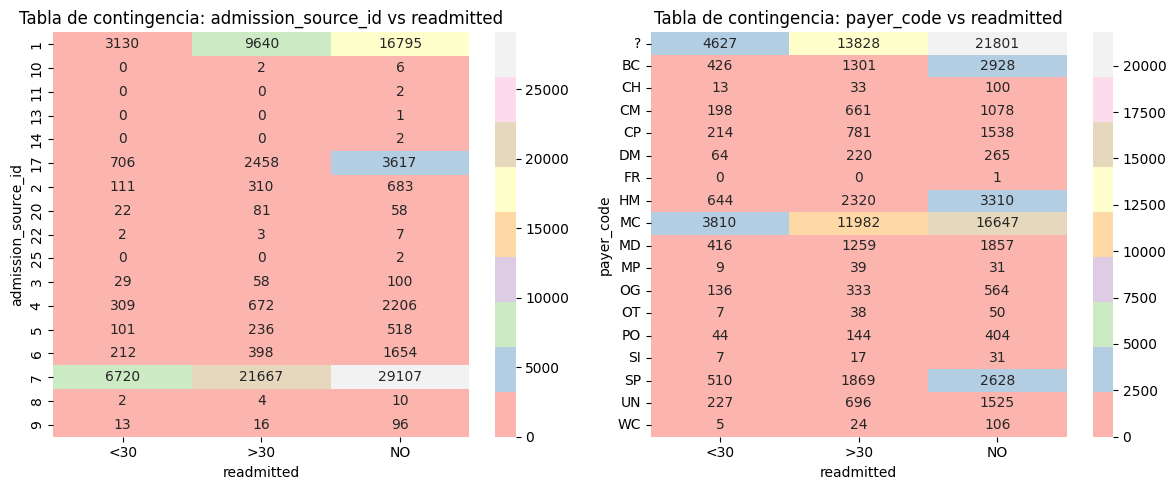

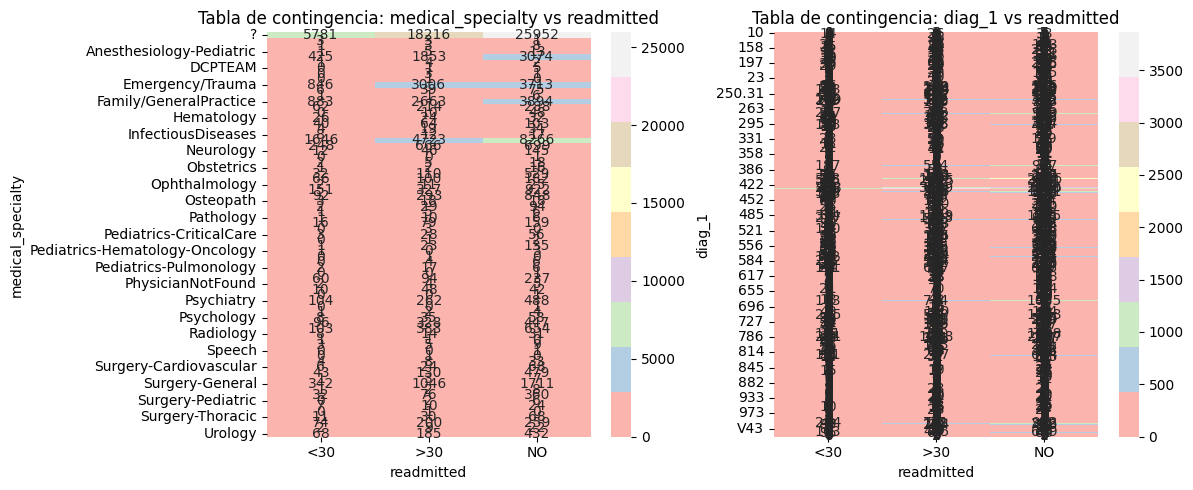

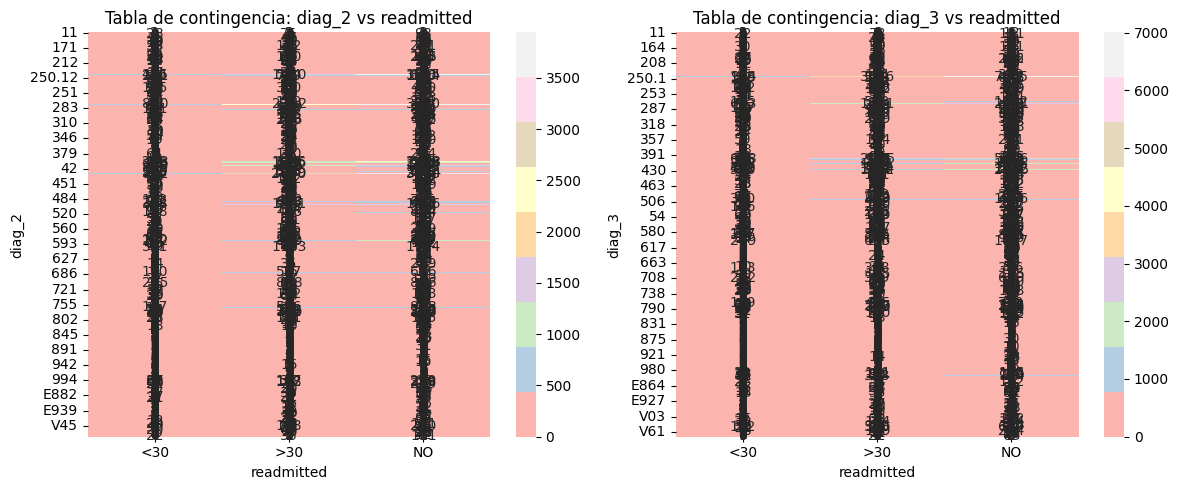

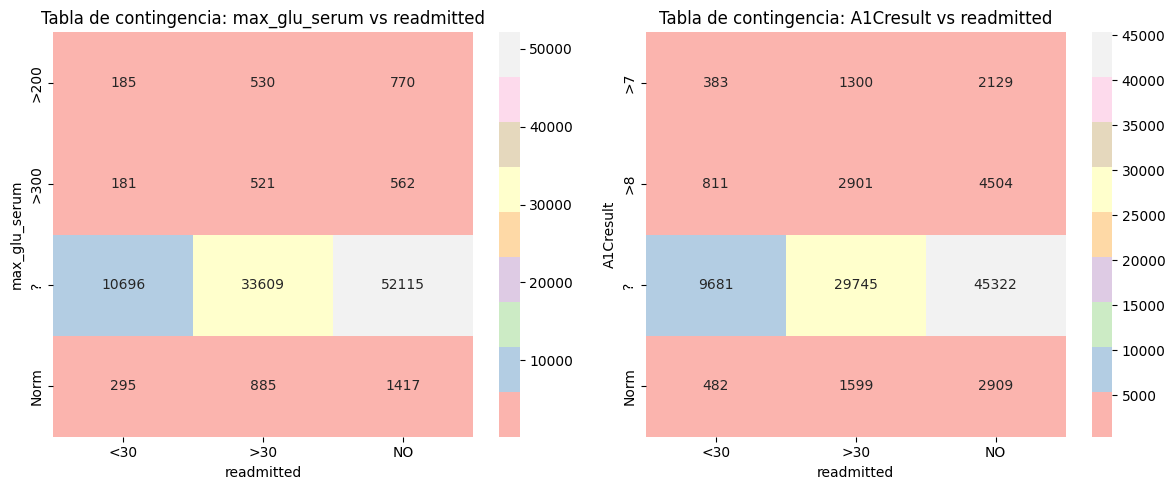

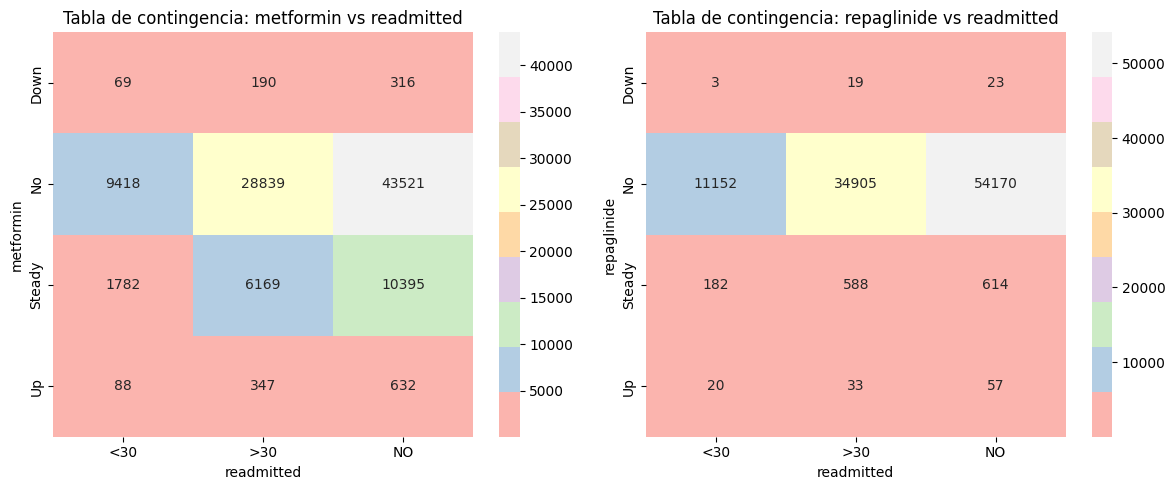

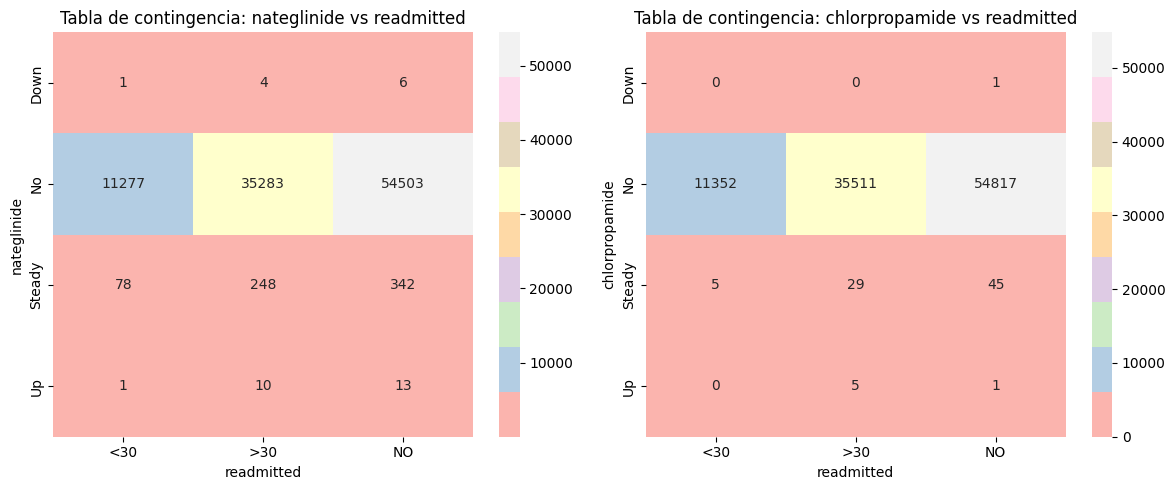

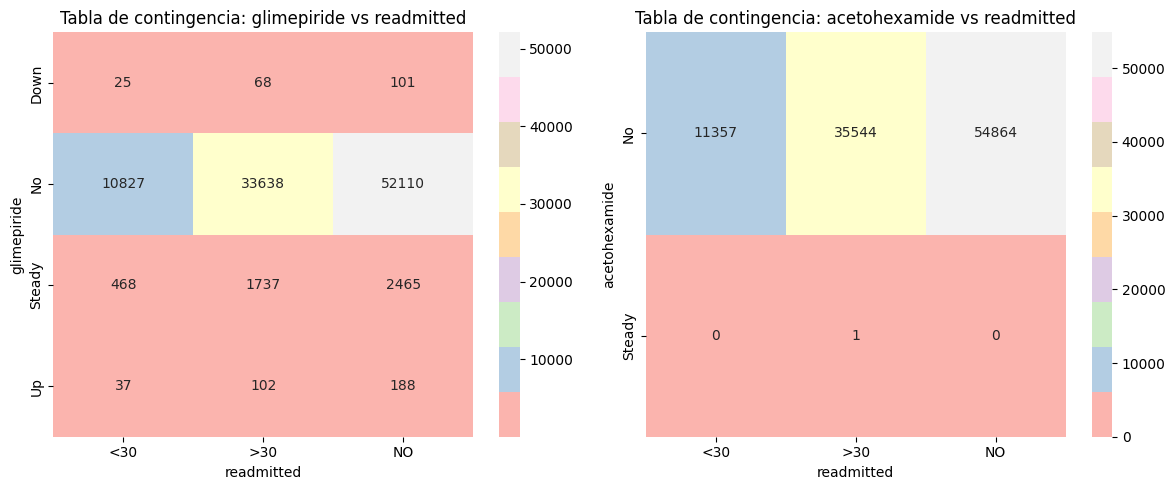

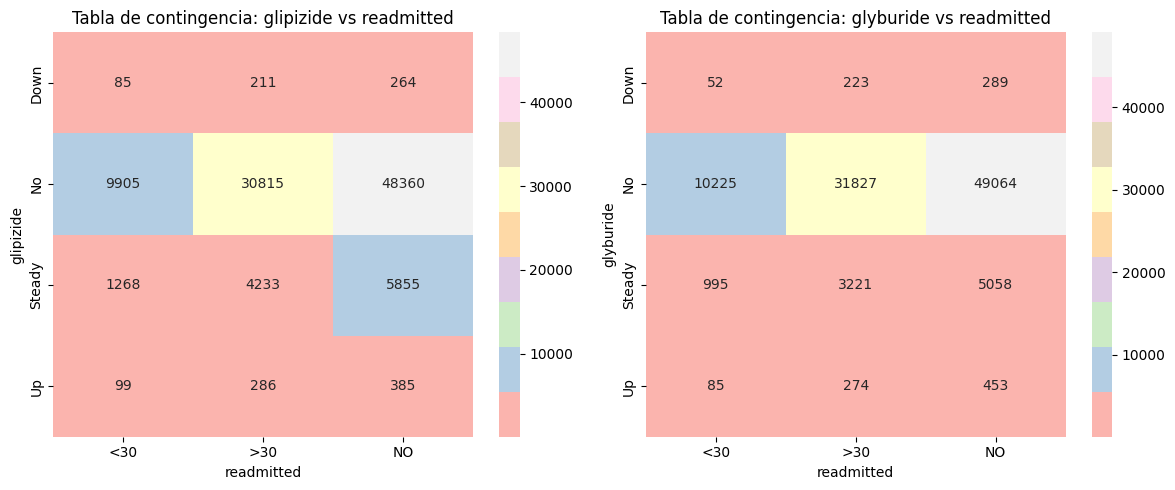

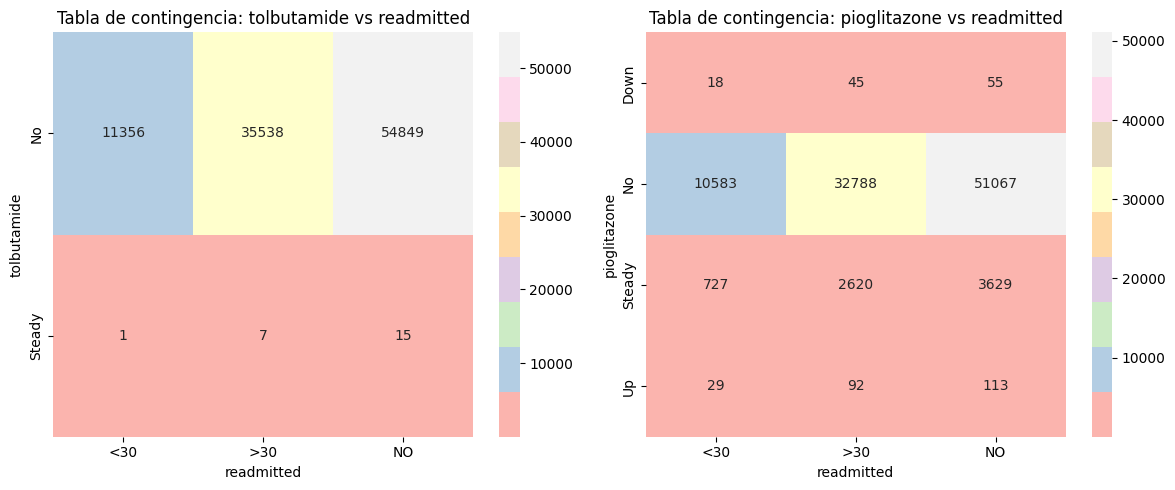

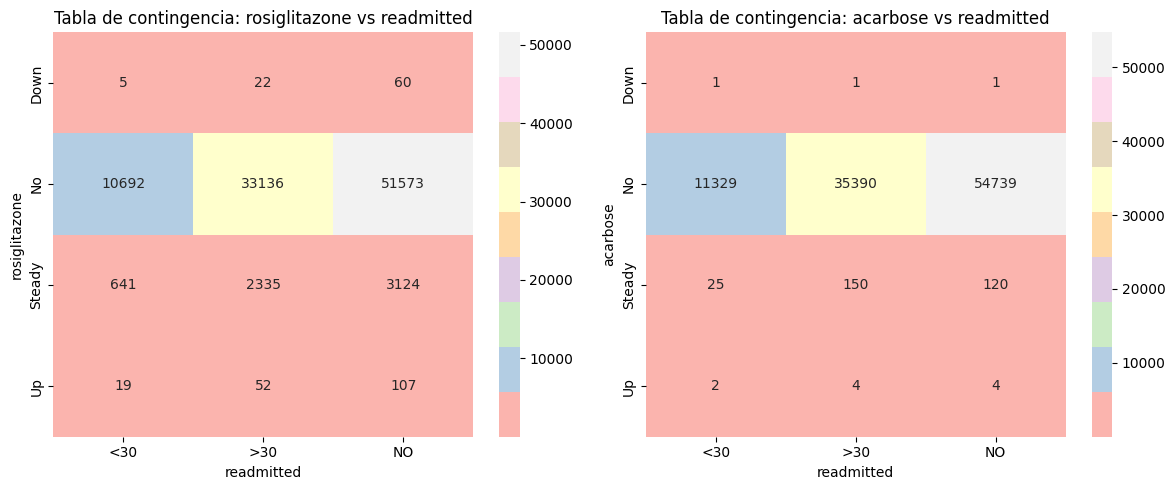

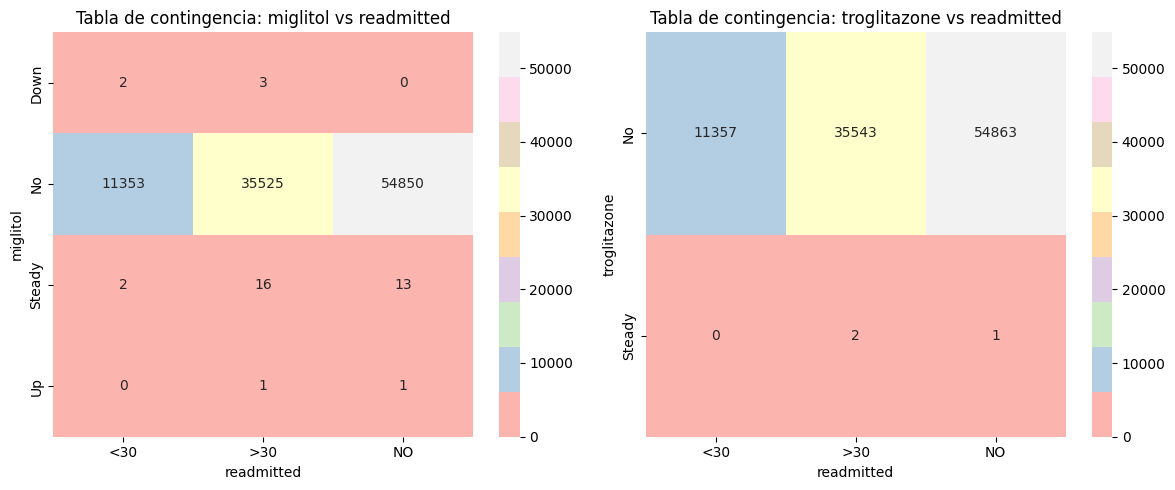

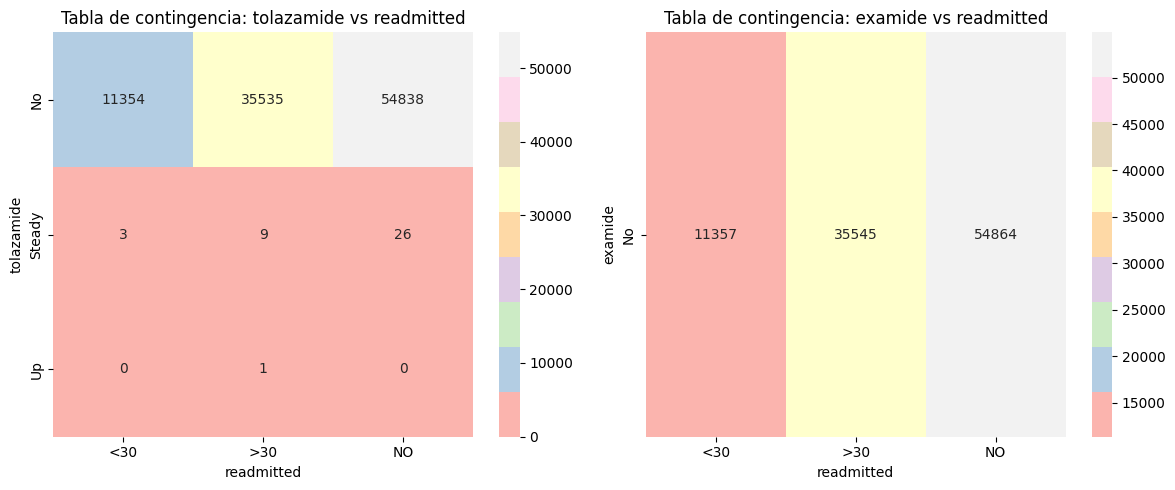

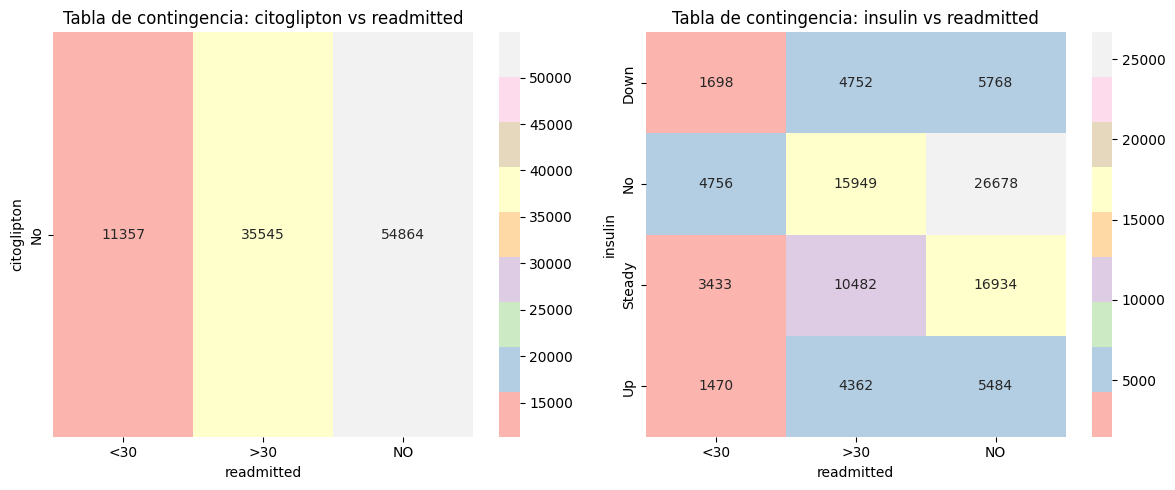

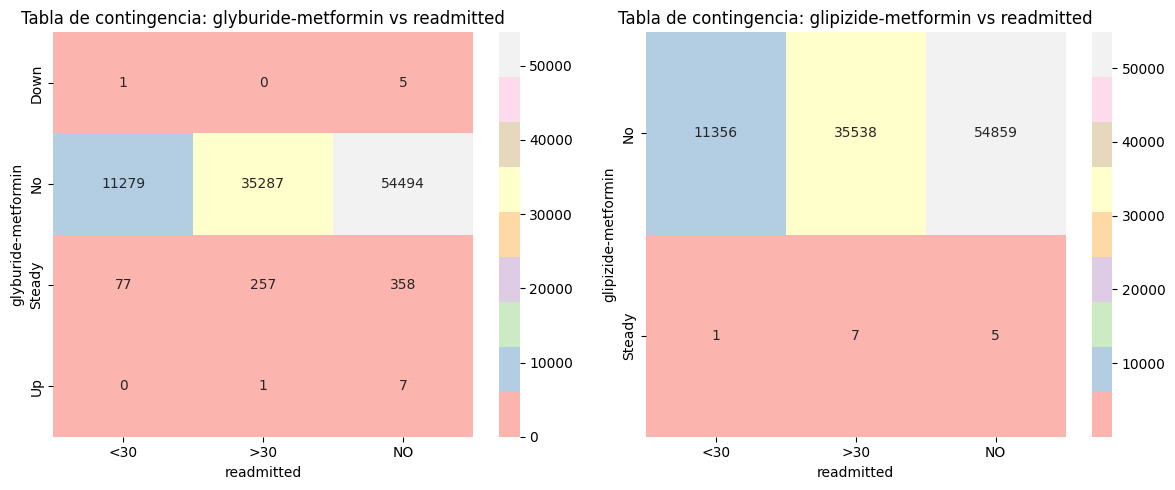

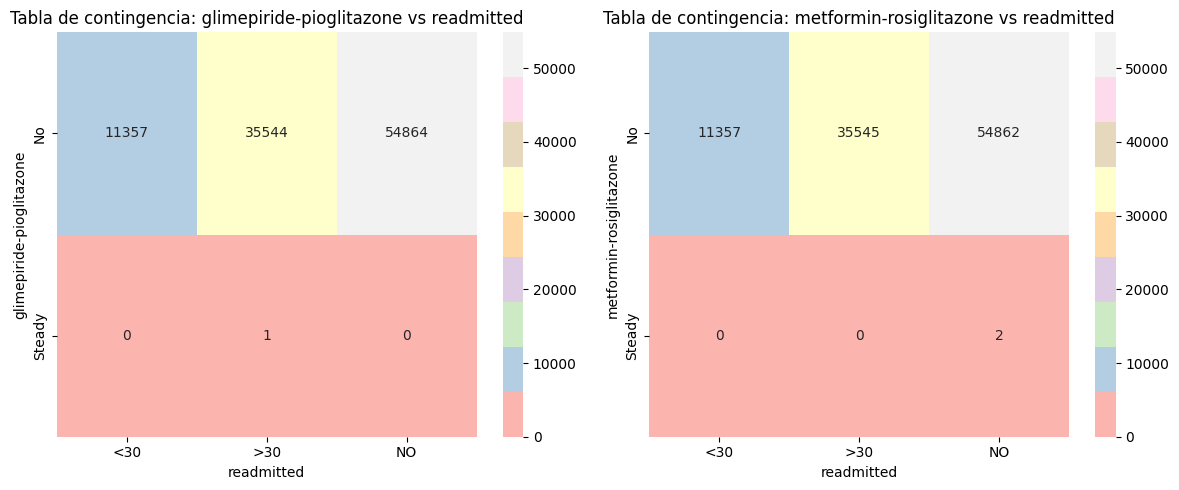

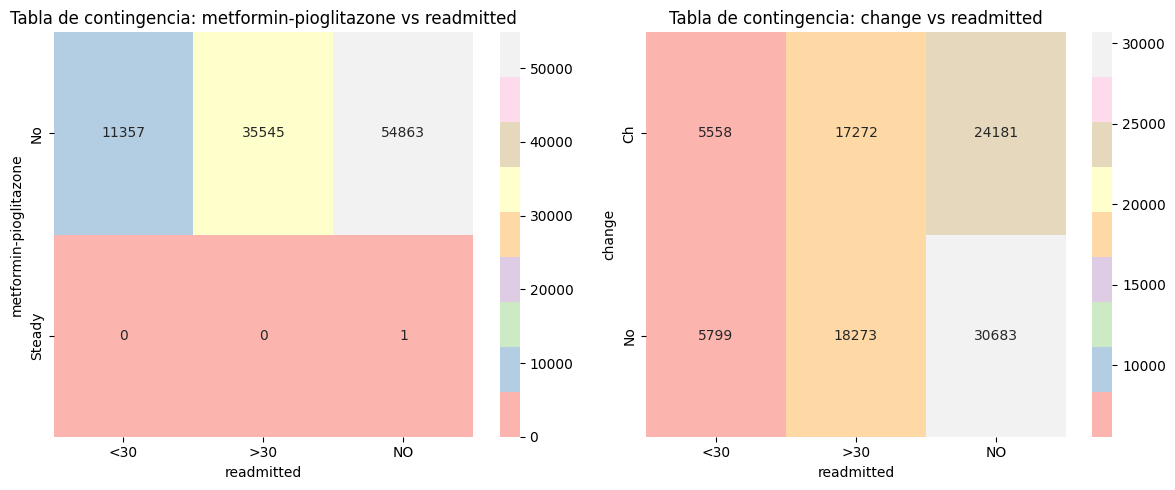

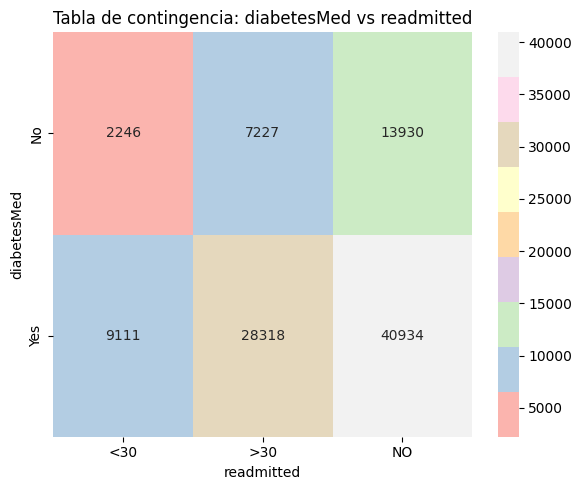

In [13]:
analisis_target(df, 'readmitted',excluir=['encounter_id', 'patient_nbr','readmitted'])

In [25]:
def top_classes_by_readmission(df, study_columns, target, top_x):

    for col in study_columns:
        print(f"\nAnálisis para la columna: {col}")
        for readm in df[target].unique():
            counts = df[df[target] == readm][col].value_counts().head(top_x)
            print(f"\nReadmission: {readm}")
            print(counts)
        print("\n" + "-" * 50 + "\n")


In [26]:
# Ejemplo de uso:
independent_study_columns = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
top_x = 5  # O el valor que desees
top_classes_by_readmission(df, independent_study_columns, 'readmitted', top_x)





Análisis para la columna: medical_specialty

Readmission: NO
medical_specialty
?                         25952
InternalMedicine           8266
Family/GeneralPractice     3894
Emergency/Trauma           3713
Cardiology                 3074
Name: count, dtype: int64

Readmission: >30
medical_specialty
?                         18216
InternalMedicine           4723
Emergency/Trauma           3006
Family/GeneralPractice     2663
Cardiology                 1853
Name: count, dtype: int64

Readmission: <30
medical_specialty
?                         5781
InternalMedicine          1646
Family/GeneralPractice     883
Emergency/Trauma           846
Cardiology                 425
Name: count, dtype: int64

--------------------------------------------------


Análisis para la columna: diag_1

Readmission: NO
diag_1
414    3861
428    2805
786    2307
410    2176
486    1825
Name: count, dtype: int64

Readmission: >30
diag_1
428    3089
414    2125
786    1418
486    1369
491    1073
Name: count, 

# Time series study

In [27]:
patient_counts = df['patient_nbr'].value_counts().reset_index()
patient_counts.columns = ['patient_nbr', 'counts']

patient_counts

,patient_nbr,counts
0,88785891,40
1,43140906,28
2,1660293,23
3,88227540,23
4,23199021,23
...,...,...
71513,11005362,1
71514,98252496,1
71515,1019673,1
71516,13396320,1


In [31]:
# df con solo pacientes que tienen pacient_nbr 23199021
filtered_df = df[df['patient_nbr'] == '23199021']
filtered_df 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
29631,96604854,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,3,...,No,No,No,No,No,No,No,No,No,>30
30779,99287754,23199021,AfricanAmerican,Male,[50-60),?,3,1,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
31876,102069222,23199021,AfricanAmerican,Male,[50-60),?,3,1,1,1,...,No,No,No,No,No,No,No,No,Yes,<30
32012,102354006,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,>30
32852,104421414,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,3,...,No,No,No,No,No,No,No,No,No,>30
36561,112449954,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,2,...,No,No,No,No,No,No,No,No,No,<30
36695,112911606,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,4,...,No,No,No,No,No,No,No,No,No,>30
37348,115687554,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,9,...,No,Down,No,No,No,No,No,Ch,Yes,>30
38030,118089798,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,2,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
38822,120699684,23199021,AfricanAmerican,Male,[50-60),?,3,1,1,3,...,No,No,No,No,No,No,No,No,No,<30


In [29]:
keeping = ['encounter_id', 'patient_nbr', 'number_emergency', 'number_inpatient', 'number_outpatient', 'time_in_hospital', 'admission_type_id']

filtered_df[keeping]

,encounter_id,patient_nbr,number_emergency,number_inpatient,number_outpatient,time_in_hospital,admission_type_id
29631,96604854,23199021,3,1,0,3,1
30779,99287754,23199021,4,2,0,3,3
31876,102069222,23199021,4,3,0,1,3
32012,102354006,23199021,4,4,0,2,1
32852,104421414,23199021,4,5,0,3,1
36561,112449954,23199021,4,6,0,2,1
36695,112911606,23199021,4,7,0,4,1
37348,115687554,23199021,3,7,0,9,1
38030,118089798,23199021,3,8,0,2,1
38822,120699684,23199021,1,8,0,3,3
